Python MiniProject #1

Neuron Diagram:

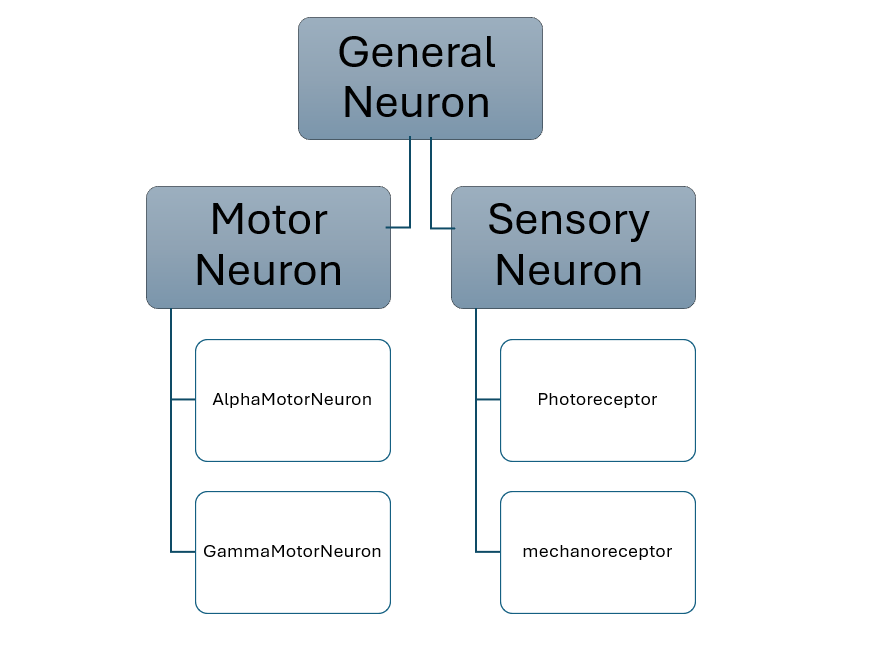

In [ ]:
class GeneralNeuron:
    def __init__(self, firing_rate):
        # Initialize the general neuron with a firing rate
        self.firing_rate = firing_rate

    def activate(self, stimulus_strength):
        # Method to activate the neuron 
        pass

class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        # Initialize the sensory neuron with a firing rate and receptor type
        super().__init__(firing_rate)
        self.receptor_type = receptor_type

    def sense_stimulus(self, stimulus):
        # Method to sense a stimulus
        pass

class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        # Initialize the motor neuron with a firing rate and target muscle
        super().__init__(firing_rate)
        self.target_muscle = target_muscle

    def control_muscle(self, activation_level):
        # Method to control the muscle based on activation level
        pass

class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        # Initialize the photoreceptor with a firing rate and receptor type "light"
        super().__init__(firing_rate, receptor_type="light")

    def light_detection(self, light_intensity):
        # Method to detect light intensity
        pass

class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        # Initialize the mechanoreceptor with a firing rate and receptor type "pressure"
        super().__init__(firing_rate, receptor_type="pressure")

    def pressure_detection(self, pressure_level):
        # Method to detect pressure level
        pass

class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        # Initialize the alpha motor neuron with a firing rate and target muscle "skeletal muscle"
        super().__init__(firing_rate, target_muscle="skeletal muscle")

    def skeletal_muscle_control(self, activation_level):
        # Method to control skeletal muscle based on activation level
        pass

class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        # Initialize the gamma motor neuron with a firing rate and target muscle "muscle spindle"
        super().__init__(firing_rate, target_muscle="muscle spindle")

    def muscle_spindle_control(self, activation_level):
        # Method to control muscle spindle based on activation level
        pass

Q1:


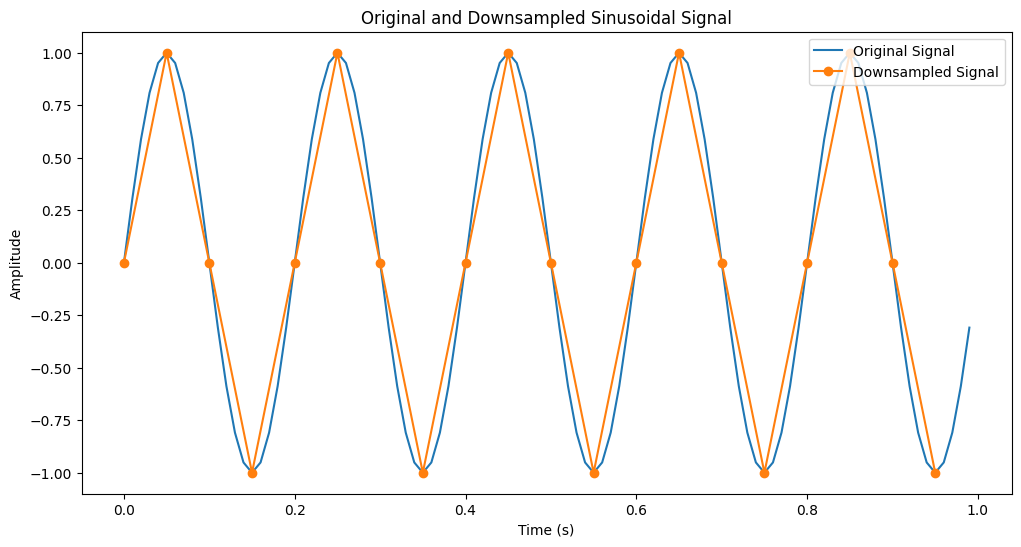

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def downsample_signal(signal, sampling_interval=5):
    # Find indices of maxima and minima
    maxima_indices = np.argwhere((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:])).flatten() + 1
    minima_indices = np.argwhere((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:])).flatten() + 1
    
    # Combine maxima and minima indices
    key_indices = np.sort(np.concatenate((maxima_indices, minima_indices)))
    
    # Downsample the signal by selecting every 5th data point
    downsampled_indices = np.arange(0, len(signal), sampling_interval)
    
    # make sure all key points are included in the downsampled signal
    combined_indices = np.union1d(downsampled_indices, key_indices)
    
    # Create the downsampled signal
    downsampled_signal = signal[combined_indices]
    
    return downsampled_signal, combined_indices

# Create a sinusoidal signal with a frequency of 5Hz
t = np.arange(0, 1, 0.01)
frequency = 5
signal = np.sin(2 * np.pi * frequency * t)

# Downsample the signal
downsampled_signal, downsampled_indices = downsample_signal(signal)

# Plot the original and downsampled signals
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Original Signal')
plt.plot(t[downsampled_indices], downsampled_signal, 'o-', label='Downsampled Signal')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original and Downsampled Sinusoidal Signal')
plt.show()


Q2:


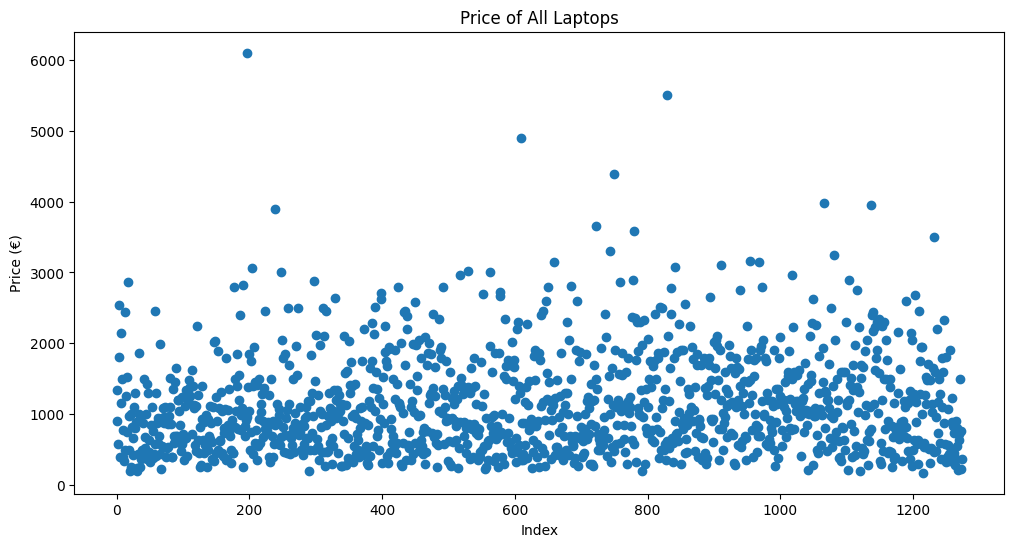

The company with the most expensive laptops on average is Razer with an average price of €3346.14


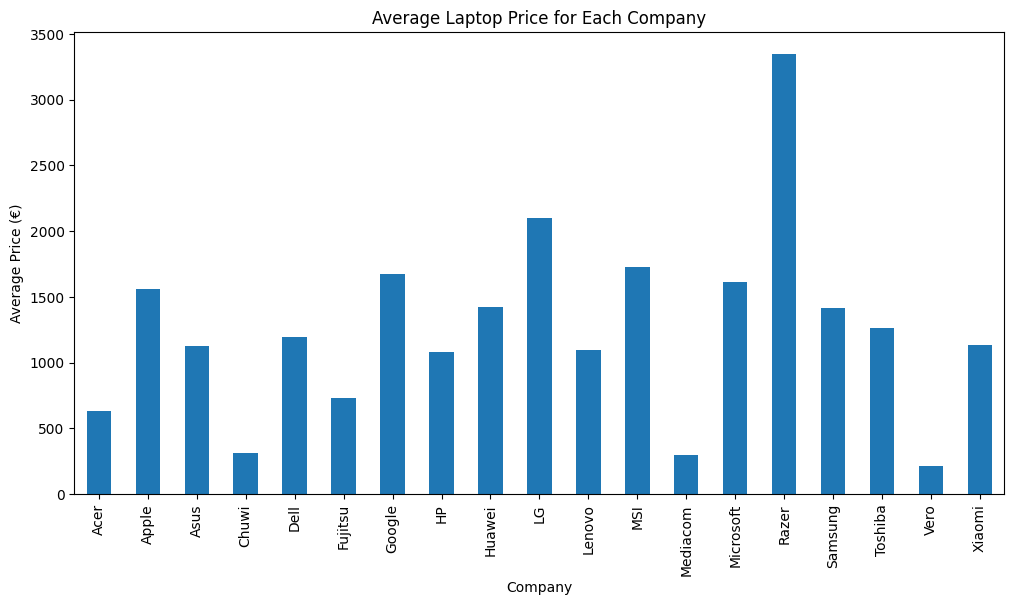

Unique Operating Systems:
['MacOS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


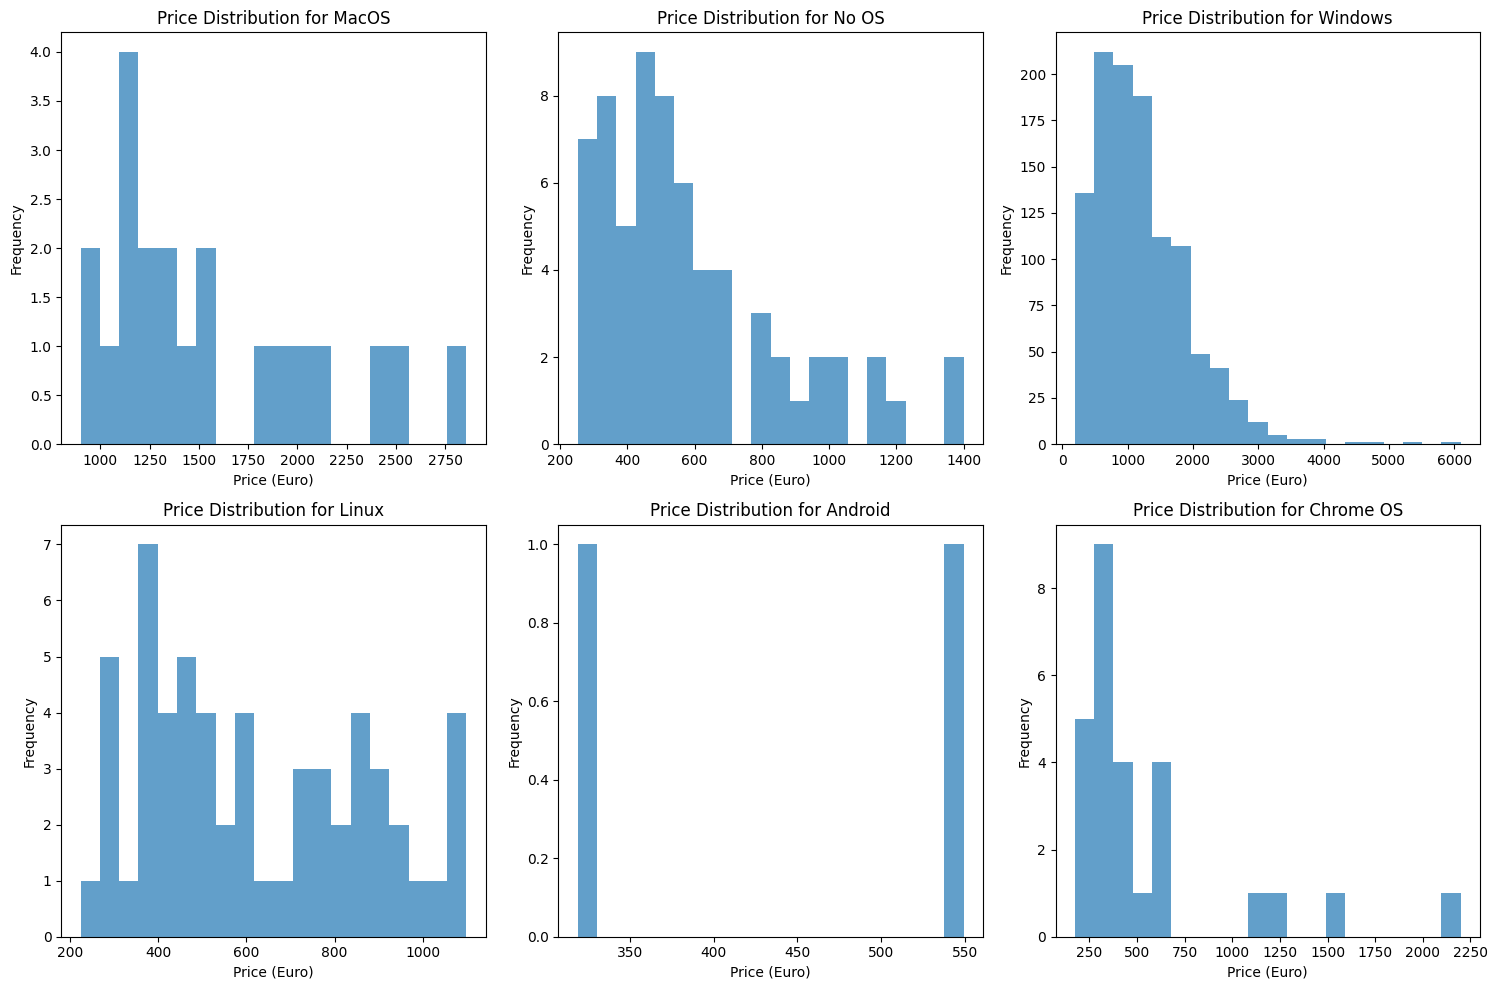

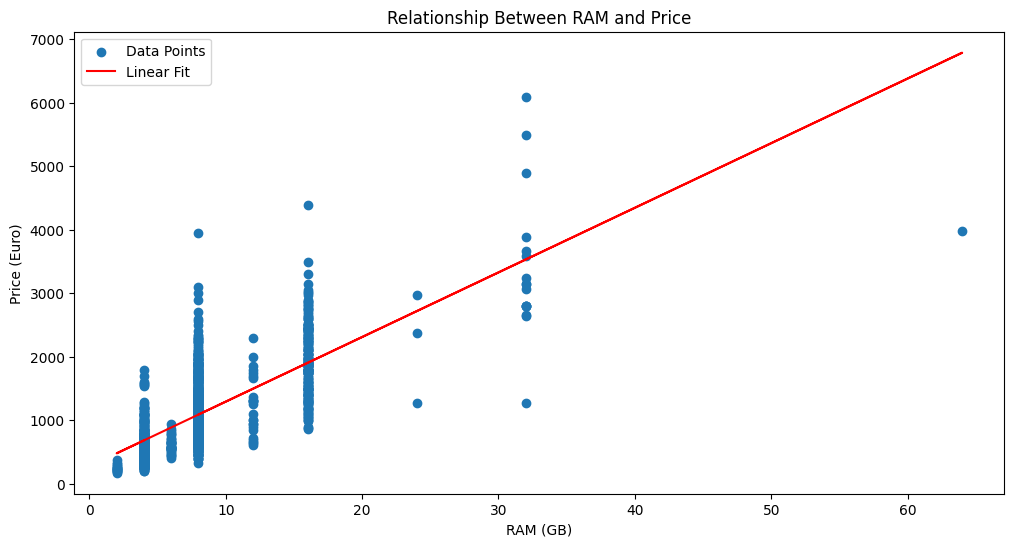

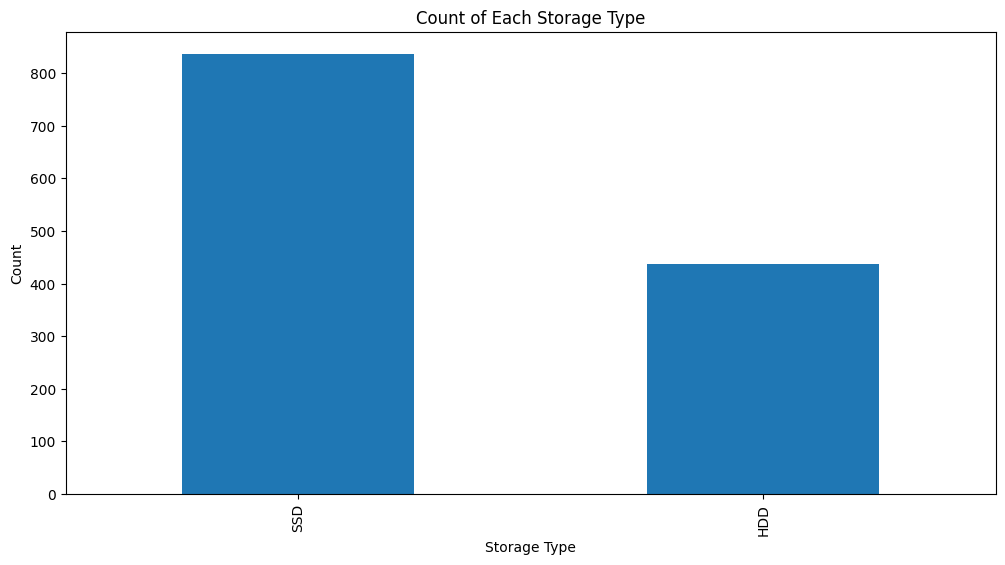

Bonus Question: What is the relationship between the weight of the laptop and its price?


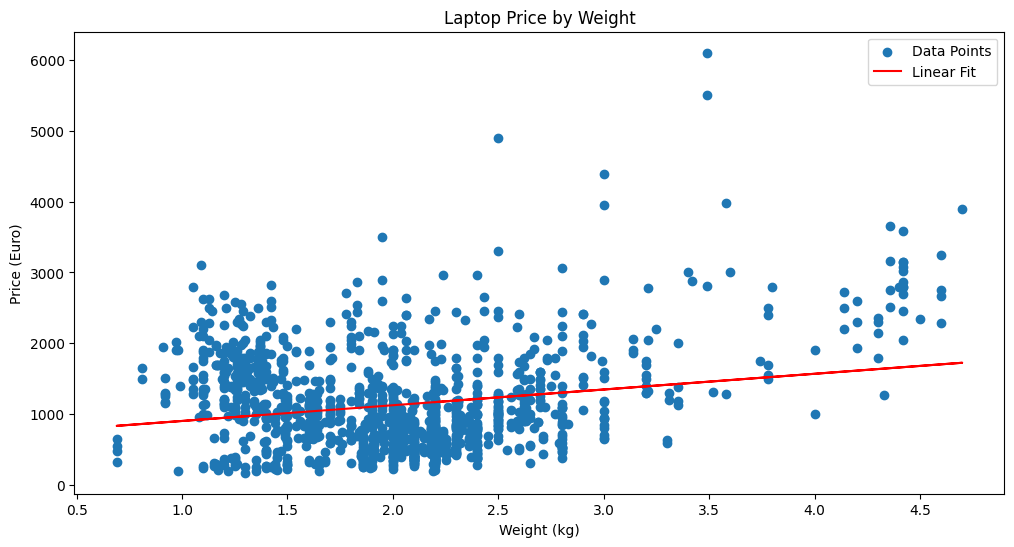

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\USER\Desktop\Advanced Python Course\MiniProject1\data\laptop_price - dataset.csv')

# Plot the price of all the laptops
plt.figure(figsize=(12, 6))
plt.plot(df['Price (Euro)'], 'o')
plt.xlabel('Index')
plt.ylabel('Price (€)')
plt.title('Price of All Laptops')
plt.show()

# Which company has on average the most expensive laptop? What is the average laptop price for each company?
average_price_per_company = df.groupby('Company')['Price (Euro)'].mean()
most_expensive_company = average_price_per_company.idxmax()
most_expensive_company_avg_price = average_price_per_company.max()

print(f"The company with the most expensive laptops on average is {most_expensive_company} with an average price of €{most_expensive_company_avg_price:.2f}")

# Plot the average laptop price for each company
plt.figure(figsize=(12, 6))
average_price_per_company.plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Average Price (€)')
plt.title('Average Laptop Price for Each Company')
plt.show()

# Find the different types of Operating systems present in the data - under the column name "OpSys"
df['OpSys'] = df['OpSys'].str.replace('Windows 10', 'Windows')
df['OpSys'] = df['OpSys'].str.replace('Windows 7', 'Windows')
df['OpSys'] = df['OpSys'].str.replace('Windows S', 'Windows')
df['OpSys'] = df['OpSys'].str.replace('Mac OS X', 'MacOS')
df['OpSys'] = df['OpSys'].str.replace('macOS', 'MacOS')
unique_os = df['OpSys'].unique()
print("Unique Operating Systems:")
print(unique_os)

# Plot for each of the operating system types the distribution of the prices separately
num_plots = len(unique_os)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
axes = axes.flatten()

for i, os in enumerate(unique_os):
    subset = df[df['OpSys'] == os]
    axes[i].hist(subset['Price (Euro)'], bins=20, alpha=0.7)
    axes[i].set_xlabel('Price (Euro)')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Price Distribution for {os}')

# Remove any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# What is the relationship between RAM and computer price? add an adequate plot to support your findings
plt.figure(figsize=(12, 6))
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], label='Data Points')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.title('Relationship Between RAM and Price')

# Add a linear trend line
m, b = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)
plt.plot(df['RAM (GB)'], m * df['RAM (GB)'] + b, color='red', label='Linear Fit')

plt.legend()
plt.show()

# Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory"
df['Storage type'] = df['Memory'].apply(lambda x: 'SSD' if 'SSD' in x else 'HDD')


# Plot the count of each storage type
plt.figure(figsize=(12, 6))
df['Storage type'].value_counts().plot(kind='bar')
plt.xlabel('Storage Type')
plt.ylabel('Count')
plt.title('Count of Each Storage Type')
plt.show()

#Bonus
print("Bonus Question: What is the relationship between the weight of the laptop and its price?")
# Plot the graph of laptop price by weight
plt.figure(figsize=(12, 6))
plt.scatter(df['Weight (kg)'], df['Price (Euro)'], label='Data Points')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.title('Laptop Price by Weight')
# Add a linear trend line
m, b = np.polyfit(df['Weight (kg)'], df['Price (Euro)'], 1)
plt.plot(df['Weight (kg)'], m * df['Weight (kg)'] + b, color='red', label='Linear Fit')

plt.legend()
plt.show()


we can see that there is a slight increase of the price when the computer is heavier